<a href="https://colab.research.google.com/github/over1234/over1234/blob/main/%EC%A0%95%ED%98%84%EC%9A%B0_01_%EB%8D%B0%EC%9D%B4%ED%84%B0%EB%B6%84%EC%84%9D%EA%B8%B0%EC%B4%88(%EC%8B%A4).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

###(해결과제1) 기상관측이래, 부산의 기온이 가장 높았던 날과 온도는?

https://data.kma.go.kr/stcs/grnd/grndTaList.do?pgmNo=70

1. 데이터 읽어오기(busan.csv)
2. 순차적으로 최고 기온 확인
3. 최고 기온이 가장 높았던 날짜의 데이터 저장
4. 최종 저장된 데이터 출력



In [ ]:
!git clone https://github.com/teacher014/databasic

Cloning into 'databasic'...
remote: Enumerating objects: 35, done.
remote: Counting objects: 100% (35/35), done.
remote: Compressing objects: 100% (33/33), done.
remote: Total 35 (delta 5), reused 0 (delta 0), pack-reused 0
Unpacking objects: 100% (35/35), done.


In [ ]:
ls

databasic/  sample_data/


In [ ]:
import csv

f = open('/content/databasic/01/busan.csv', 'r', encoding='cp949')
data = csv.reader(f)
data

header = next(data)
print(header)

for row in data:
  print(row)
  break
#f.close()

['날짜', '지점', '평균기온(℃)', '최저기온(℃)', '최고기온(℃)']
['1904-04-09', '159', '11.3', '7.8', '16.1']


In [ ]:
# 최고기온을 실수로 변환
for row in data:
  if row[-1] == '' : row[-1] = -999
  row[-1] = float(row[-1])
  print(row)
  break

NameError: ignored

In [ ]:
# 최저기온을 실수로 변환
for row in data:
  if row[-2] == '' : row[-2] = 999
  row[-2] = float(row[-2])
  print(row)
  break

NameError: ignored

In [ ]:
# 최고기온, 해당날짜 
max_tmp = -999
max_day = ''

for row in data:
  if row[-1] == '' : row[-1] = -999
  row[-1] = float(row[-1])

  if max_tmp < row[-1]:
    max_tmp = row[-1]
    max_day = row[0] # 최고기온-날짜  

print(max_day,max_tmp)

2016-08-14 37.3


In [ ]:
# 최저기온, 해당날짜
min_tmp = 999
min_day = ''

for row in data:
  if row[-2] == '' : row[-2] = 999
  row[-2] = float(row[-2])
  if min_tmp > row[-2]: 
    min_tmp = row[-2]
    min_day = row[0]# 최저기온-날짜
print(min_day, min_tmp)    


NameError: ignored

In [ ]:
print(f'기상관측이래 부산의 최고기온 : {max_day} {max_tmp} 도')
print(f'기상관측이래 부산의 최저기온 : {min_day} {min_tmp} 도')

기상관측이래 부산의 최고기온 : 2016-08-14 37.3 도
기상관측이래 부산의 최저기온 :  999 도


###(해결과제2) 내 생일 기온 변화 그래프 그리기
- 최고, 최저 기온

In [ ]:
#파일 읽어오기, 헤더 
import csv

f=open('/content/databasic/01/busan1.csv')
data = csv.reader(f)
data
next(data)

for row in data:
  print(row)
  break

['1904-04-09', '159', '11.3', '7.8', '16.1']


In [ ]:
#데이터 리스트에 저장하기(최고기온)
result = [] # 최고 기온 데이터를 저장할 리스트 생성

for row in data :
    if row[-1] != '' : # 최고 기온 데이터 값이 존재한다면
        result.append(float(row[-1])) # result 리스트에 최고 기온 값 추가
print(result)

[15.2, 14.9, 13.4, 16.9, 16.0, 10.5, 11.3, 12.6, 15.4, 18.3, 17.2, 16.4, 16.7, 15.1, 17.6, 21.4, 20.8, 18.1, 20.9, 15.3, 19.5, 18.0, 21.1, 18.7, 17.7, 21.9, 23.0, 23.6, 21.7, 18.2, 17.9, 17.0, 18.6, 21.0, 21.1, 19.6, 23.5, 22.8, 23.5, 22.6, 22.7, 20.9, 16.1, 19.3, 18.2, 19.1, 21.6, 22.7, 20.7, 22.3, 22.1, 23.0, 23.6, 23.4, 23.8, 21.6, 25.6, 27.3, 25.1, 26.1, 24.8, 24.8, 27.9, 29.6, 22.6, 22.8, 22.6, 22.7, 24.6, 22.5, 24.9, 29.8, 24.4, 23.7, 21.2, 25.3, 25.8, 25.1, 26.3, 27.2, 27.3, 23.6, 21.8, 25.2, 28.2, 28.5, 28.4, 29.2, 31.5, 24.6, 20.1, 20.1, 19.9, 23.6, 27.6, 28.0, 28.5, 27.7, 27.2, 25.4, 26.3, 26.5, 27.2, 28.6, 29.2, 29.7, 31.9, 30.8, 30.9, 27.8, 28.0, 30.3, 30.2, 29.2, 28.0, 27.5, 29.0, 30.9, 30.0, 30.2, 30.5, 31.5, 31.0, 31.5, 31.3, 32.0, 31.3, 30.6, 29.0, 30.7, 28.5, 27.0, 28.2, 28.1, 28.5, 27.4, 29.3, 29.0, 28.5, 27.2, 28.6, 30.8, 25.4, 28.4, 27.5, 28.0, 26.0, 29.4, 28.0, 27.0, 26.2, 27.2, 28.2, 23.4, 28.0, 28.3, 27.2, 27.3, 30.4, 27.5, 26.3, 24.5, 24.7, 24.7, 24.0, 25.3, 24.

In [ ]:
len(result)

42948

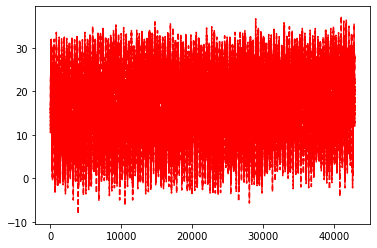

In [ ]:
#시각화
import matplotlib.pyplot as plt
plt.plot(result, 'r--')
plt.show()

<Figure size 720x144 with 0 Axes>

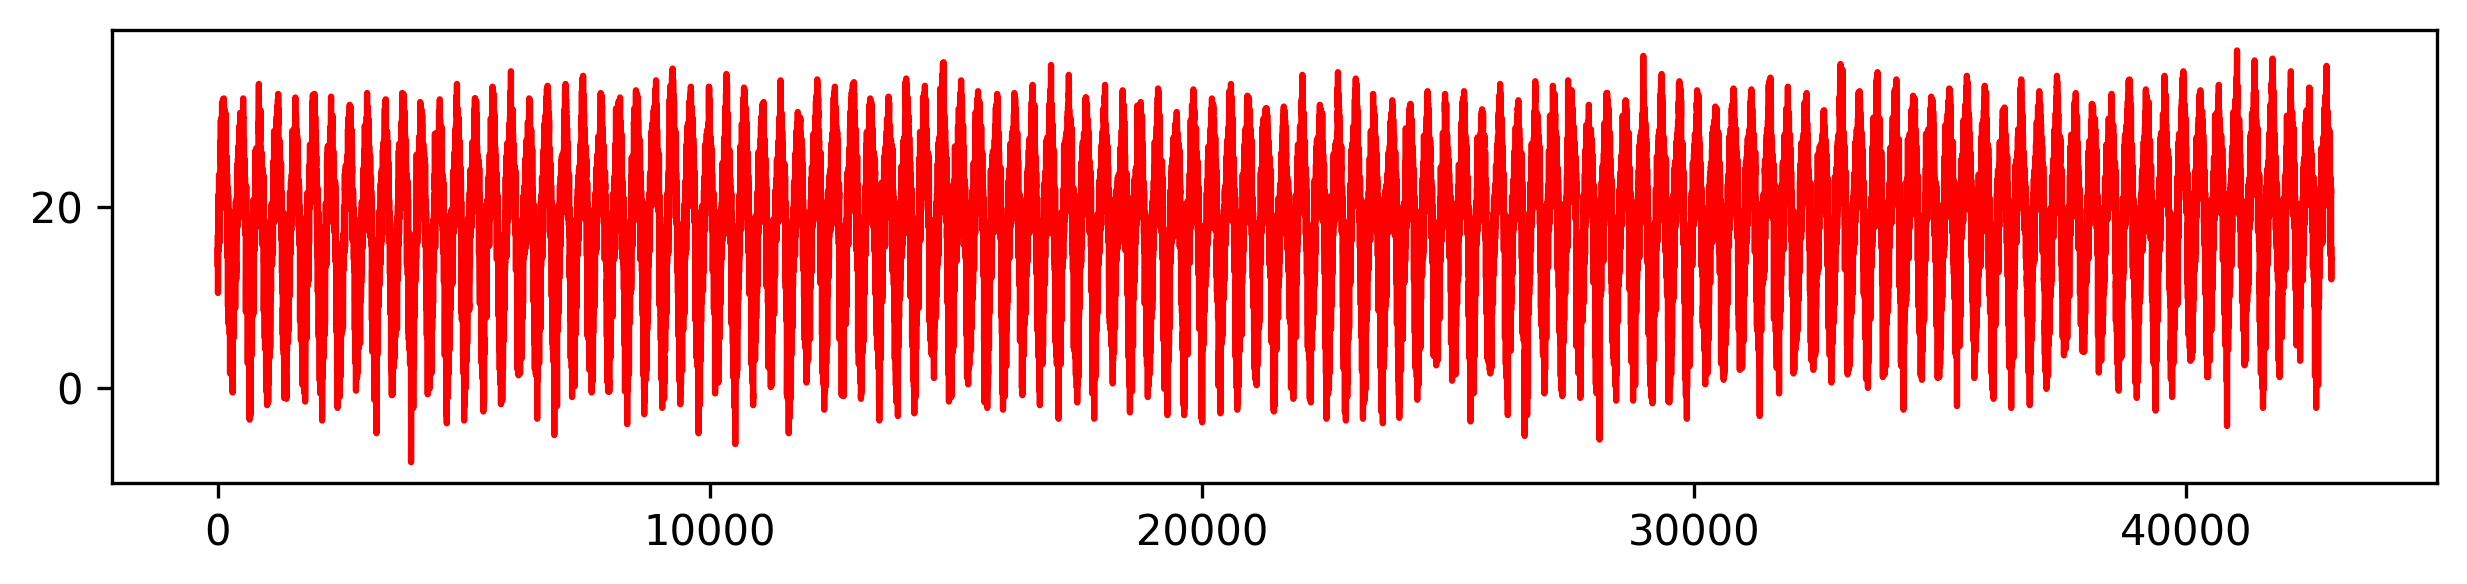

In [ ]:
import matplotlib.pyplot as plt
plt.figure(figsize = (10,2))
plt.figure(figsize = (10,2), dpi = 300)
plt.plot(result, 'r')
plt.show()

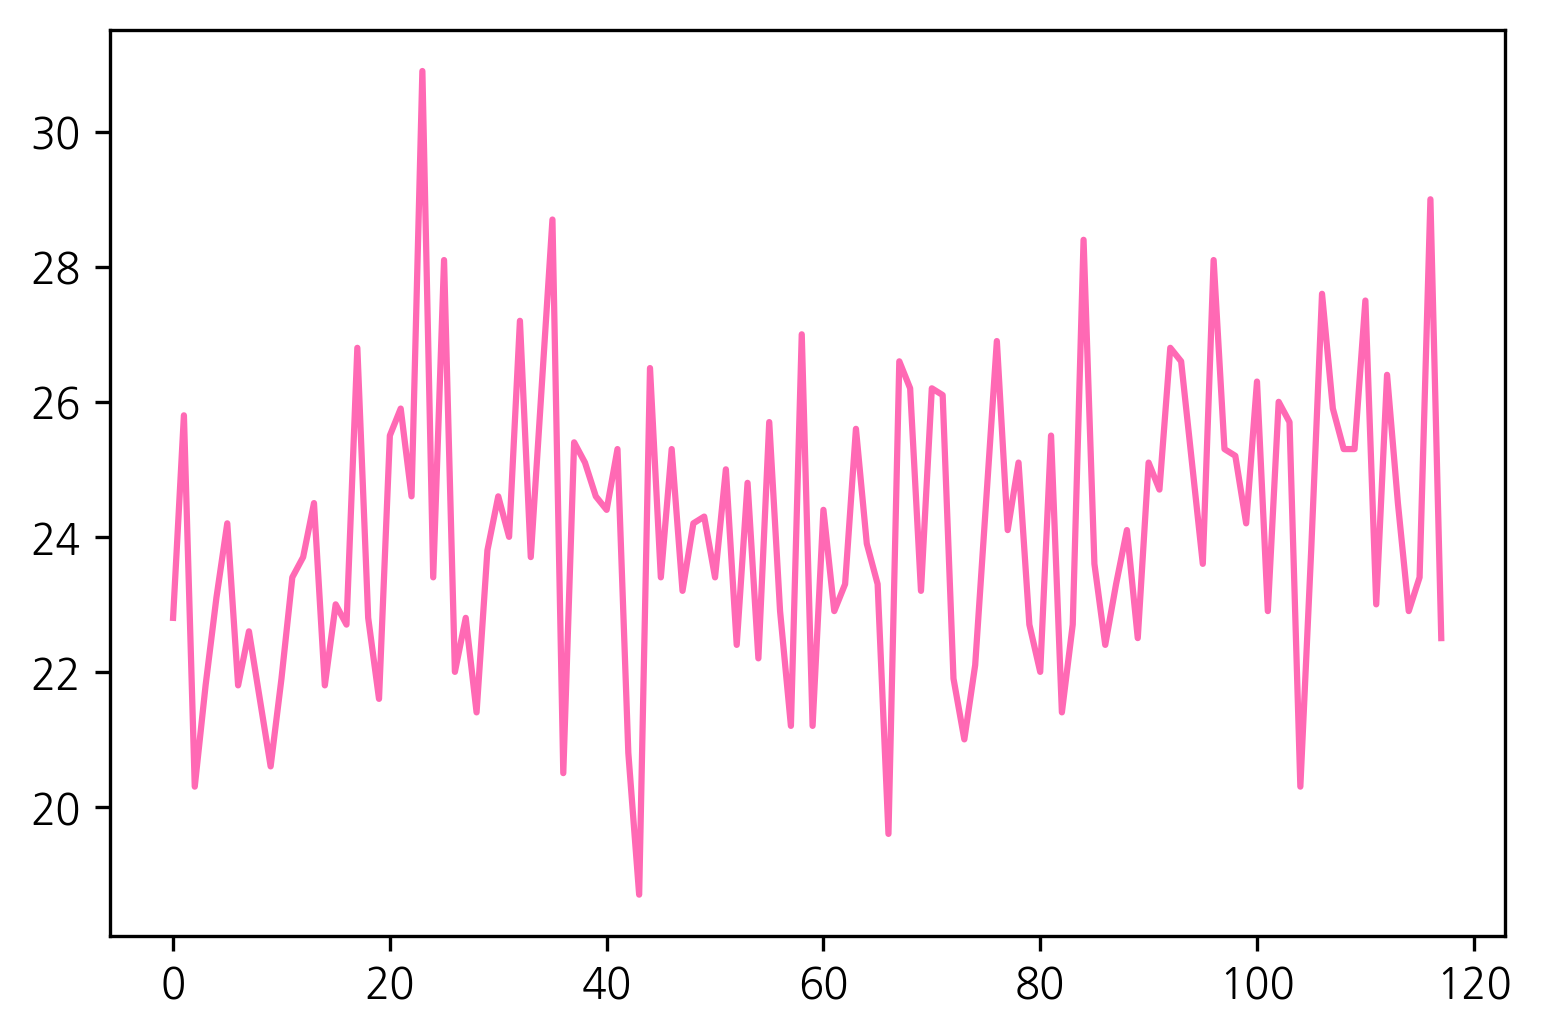

In [ ]:
#날짜 데이터 추출하기
import csv

f = open('/content/databasic/01/busan1.csv')
data = csv.reader(f)
data
next(data)
result = []

for row in data :
    if row[-1] != '' :
      if 2005 <= int(date[0]) :
        if row[0].split('-')[1] == '06' and row[0].split('-')[2] == '16' :
            result.append(float(row[-1]))

import matplotlib.pyplot as plt
plt.figure(dpi = 300)
plt.plot(result, 'hotpink')
plt.show()

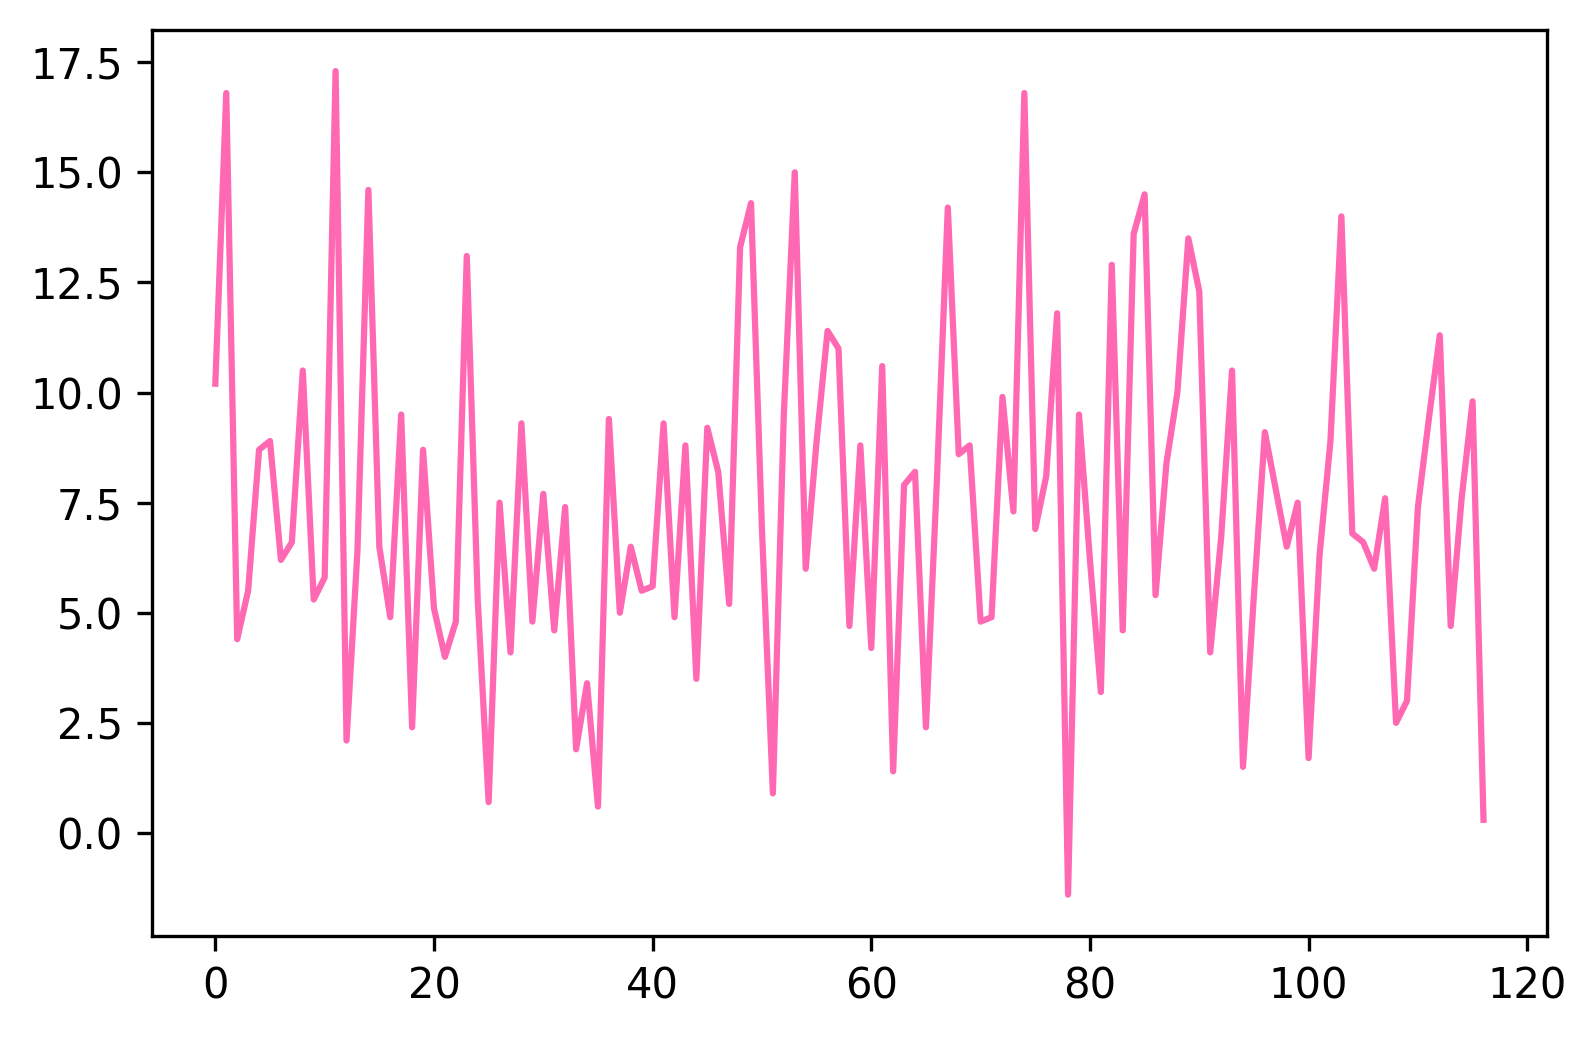

In [ ]:
import csv

f = open('/content/databasic/01/busan1.csv')
data = csv.reader(f)
next(data)
result = []

for row in data :
    if row[-1] != '' :
        if row[0].split('-')[1] == '01' and row[0].split('-')[2] == '09' :
            result.append(float(row[-1]))

import matplotlib.pyplot as plt
plt.figure(dpi = 300)
plt.plot(result, 'hotpink')
plt.show()

In [ ]:
#한글 폰트 사용하기
 
!apt -qq -y install fonts-nanum

fonts-nanum is already the newest version (20170925-1).
0 upgraded, 0 newly installed, 0 to remove and 37 not upgraded.


In [ ]:
# 폰트 세팅
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm

fontpath = '/usr/share/fonts/truetype/nanum/NanumGothic.ttf'
font = fm.FontProperties(fname=fontpath, size=10)
fm._rebuild()

In [ ]:
# 위 코드 실행 후 [메뉴] - [런타임] - [런타임 다시 시작] - [예]

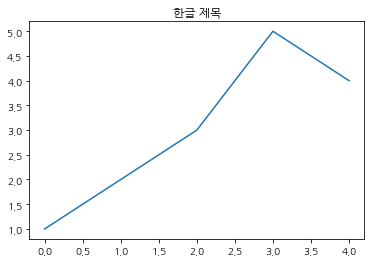

In [ ]:
import matplotlib.pyplot as plt
plt.rc('font', family='NanumGothic') 
plt.title('한글 제목')
plt.plot([1,2,3,5,4])
plt.show()

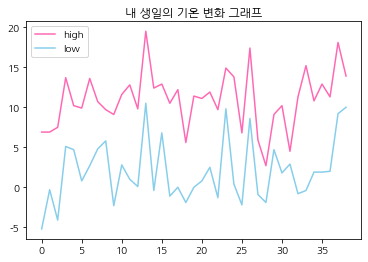

In [ ]:
import csv

f = open('/content/databasic/01/busan1.csv')
data = csv.reader(f)
next(data)
high = [] # 최고 기온 값을 저장할 리스트 high 생성
low = [] # 최저 기온 값을 저장할 리스트 low 생성

for row in data :
    if row[-1] != '' and row[-2] != '' : # 최고 기온 값과 최저 기온 값이 존재한다면
        date = row[0].split('-') # 날짜 값을 – 문자를 기준으로 구분하여 저장
        if 1983 <= int(date[0]) : # 1983년 이후 데이터라면
            if date[1] == '02' and date[2] == '14' : # 2월 14일이라면
                high.append(float(row[-1])) # 최고 기온 값을 high 리스트에 저장
                low.append(float(row[-2])) # 최저 기온 값을 low 리스트에 저장

plt.rc('font', family = 'NanumGothic') # 나눔 고딕을 기본 글꼴로 설정
plt.rcParams['axes.unicode_minus'] = False # 마이너스 기호 깨짐 방지
plt.title('내 생일의 기온 변화 그래프') # 제목 설정
plt.plot(high, 'hotpink', label = 'high') # high 리스트에 저장된 값을 hotpink 색으로 그리고 레이블을 표시
plt.plot(low, 'skyblue', label = 'low') # low 리스트에 저장된 값을 skyblue 색으로 그리고 레이블을 표시
plt.legend() # 범례 표시
plt.show() # 그래프 나타내기